<h1> Using Regression Analysis to find drivers behind Marketing Engagement</h1>

<b>Dataset</b> - IBM Watson Marketing Customer Value Data

https://www.kaggle.com/datasets/pankajjsh06/ibm-watson-marketing-customer-value-data

In this analysis, we aim to leverage regression analysis techniques to uncover the underlying drivers behind marketing engagement within the IBM Watson Marketing Customer Value Data. The dataset, obtained from Kaggle, provides valuable insights into customer interactions, behaviors, and various attributes that influence marketing engagement.

Regression analysis is a powerful statistical method used to understand the relationships between dependent and independent variables. By applying this analytical approach to our dataset, we seek to identify significant factors that contribute to marketing engagement. These factors may include customer demographics, behavioral patterns, and other relevant features.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [3]:
df.shape

(9134, 24)

In [4]:
df.head(3)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


The column "Response" contains information on whether a customer responded to marketing calls. 

We will use this field as a measure of customer engagement. 

For future computations, it will be better to encode this field with numerical values.

In [5]:
df['Response'].value_counts()

Response
No     7826
Yes    1308
Name: count, dtype: int64

In [6]:
# Using map
response_mapping = {'No': 0, 'Yes': 1}
df['Engaged'] = df['Response'].map(response_mapping)

We need to explore insights from the marketing campaign dataset by determining the overall Engagement Rate, investigating Engagement variations across different Sales Channels, and studying the distribution of Total Claim Amounts based on Engagements.

In [7]:
# Engagement Rate
engagement_rate_df = pd.DataFrame(df.groupby('Engaged').count()['Response']/df.shape[0]*100)
engagement_rate_df.T

Engaged,0,1
Response,85.679877,14.320123


**14%** of the customers have responded to marketing calls, and the remaining **86%** of the customers have not responded.

In [8]:
# Engagement Variations by Sale Channels
engage_by_sales_channel_df = pd.pivot_table(df, values='Response', 
                                            index='Sales Channel', columns='Engaged', aggfunc=len).fillna(0.0)

engage_by_sales_channel_df.columns = ['Not Engaged', 'Engaged']

In [9]:
engage_by_sales_channel_df

,Not Engaged,Engaged
Sales Channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


To make the differences more visually identifiable, we can build pie charts.

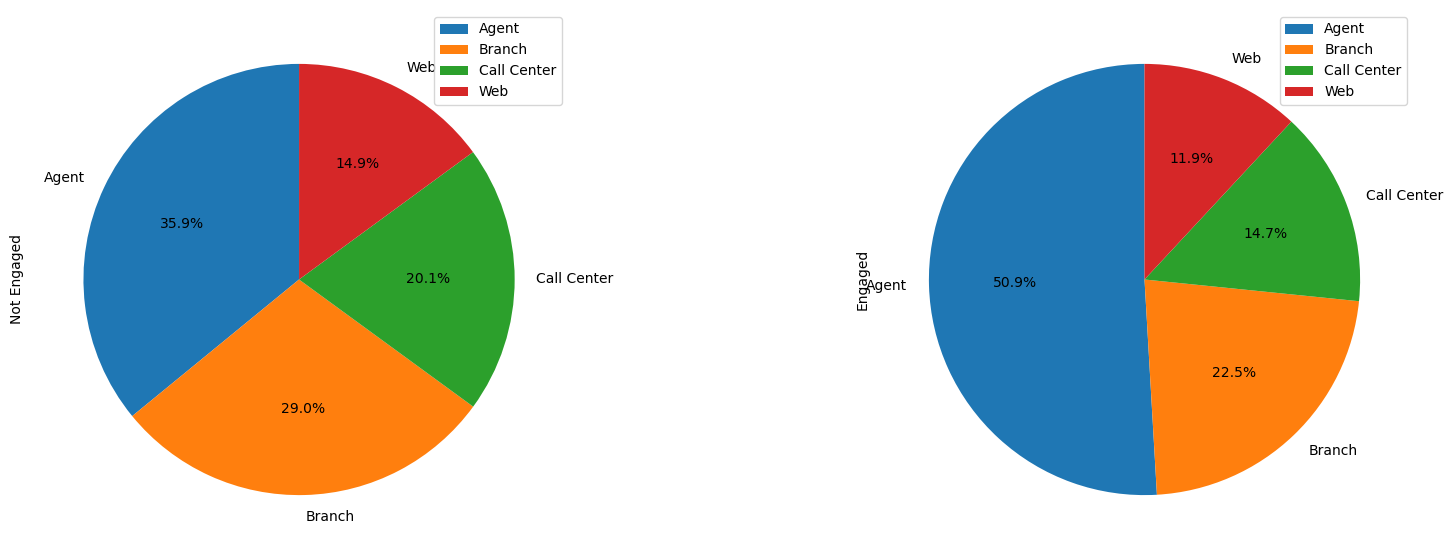

In [10]:
engage_by_sales_channel_df.plot(kind='pie', figsize=(20, 7), 
                                startangle=90, subplots=True, 
                                autopct=lambda x: '%0.1f%%' % x)

plt.show()

The majority of engaged customers originated from agents, while non-engaged customers exhibit a more balanced distribution across all four distinct channels.

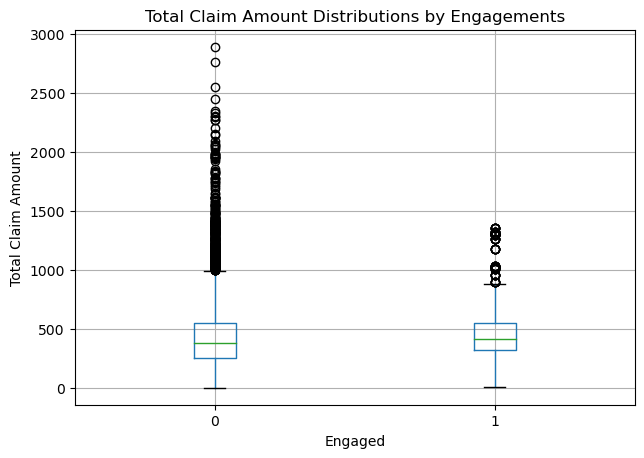

In [11]:
# Total Claim Amounts

ax = df[['Engaged', 'Total Claim Amount']].boxplot(by='Engaged',
                                                   showfliers=True,
                                                   figsize=(7,5))

ax.set_xlabel('Engaged')
ax.set_ylabel('Total Claim Amount')
ax.set_title('Total Claim Amount Distributions by Engagements')
plt.suptitle("")
plt.show()

<h2>Regression Analysis Using Continuous Variables</h2>

In [12]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Engaged
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,0.143201
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.350297
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,0.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,0.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,0.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.000000


In [13]:
# collect continuouse variables
continuous_vars = [
 'Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
 'Months Since Last Claim', 'Months Since Policy Inception',
 'Number of Open Complaints', 'Number of Policies',
 'Total Claim Amount'
]

In [14]:
# fit a logistic regression model with continuous variables
import statsmodels.api as sm

logit = sm.Logit(df['Engaged'], df[continuous_vars])

In [15]:
logit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.421189
         Iterations 6


In [16]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9126
Method:                           MLE   Df Model:                            7
Date:                Tue, 09 Jan 2024   Pseudo R-squ.:                -0.02546
Time:                        22:59:41   Log-Likelihood:                -3847.1
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.741e-06   5.04e-06     -1.337      0.181   -1.66e-05    3.14e-06
Income                        -2.857e-06   1.03e-06     -2.766      0.006   -4.88e-06   -8.33e-07
Monthly Premium Auto             -0.0084      0.001     -6.889      0.000      -0.011      -0.006
Months Since Last Claim          -0.0202      0.003     -7.238      0.000      -0.026      -0.015
Months Since Policy Inception    -0.0060      0.001     -6.148      0.000      -0.008      -0.004
Number of Open Complaints        -0.0829      0.034     -2.424      0.015      -0.150      -0.016
Number of Policies               -0.0810      0.013     -6.356      0.000      -0.106      -0.056
Total Claim Amount                0.0001      0.000      0.711      0.477      -0.000       0.000
=================================================================================================
"""

Interpret the regression analysis results quite easily by looking at the p-values and coefficients of the features from the model output.

The lower the value of P>|z| is, the more likely it is that the relationship between the given feature and the output variable is strong and is not by chance.

We can see that

- Income, 
- Monthly Premium Auto,
- Months Since Last Claim, 
- Months Since Policy Inception, and 
- Number of Policies variables 

have significant relationships with the output variable, **Engaged**.

For example, Number of Policies variable is significant and is
negatively correlated with Engaged. This suggests that the more policies that
the customers have, the less likely they are to respond to marketing calls. 

As another example, the Months Since Last Claim variable is significant and is
negatively correlated with the output variable, Engaged. This means that the
longer it has been since the last claim, the less likely that the customer is
going to respond to marketing calls.

<h2>Regression Analysis Using Categorical Variables</h2>

In [17]:
# factorize gender
gender_values, gender_labels = df['Gender'].factorize()

In [18]:
print(gender_values)
print(gender_labels)

[0 0 0 ... 1 1 1]
Index(['F', 'M'], dtype='object')


In [19]:
# encode the education (categorical variable) with orderings
categories = pd.Categorical(df['Education'], 
                            categories=['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor'])

In [20]:
categories.codes

array([1, 1, 1, ..., 1, 2, 2], dtype=int8)

In [21]:
# add these encoded variables to the df
df['GenderFactorized'] = gender_values
df['EducationFactorized'] = categories.codes

In [22]:
# fit a logistic regression model
logit = sm.Logit(df['Engaged'], df[['GenderFactorized','EducationFactorized']])

logit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.493068
         Iterations 6


In [23]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9132
Method:                           MLE   Df Model:                            1
Date:                Tue, 09 Jan 2024   Pseudo R-squ.:                 -0.2005
Time:                        22:59:41   Log-Likelihood:                -4503.7
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
GenderFactorized       -1.1266      0.047    -24.116      0.000      -1.218      -1.035
EducationFactorized    -0.6256      0.021    -29.900      0.000      -0.667      -0.585
=======================================================================================
"""

By looking at the p-values in the **P>|z|**
column, both the **GenderFactorized** and **EducationFactorized** variables seem to have
significant relationships with the output variable **Engaged**. 

If we look at the coefficients of these two variables, we can see that both are negatively
correlated with the output. 

This suggests that male customers, encoded with
1 in the GenderFactorized variable, are less likely to be engaged with marketing
calls, as compared to female customers, encoded with 0 in
the GenderFactorized variable. 

Similarly, the higher the customers' education
levels are, the less likely that they will be engaged with marketing calls.

<h2>Combining continuous and categorical variables</h2>

In [24]:
logit = sm.Logit(df['Engaged'],
                                 df[['Customer Lifetime Value',
                                 'Income',
                                 'Monthly Premium Auto',
                                 'Months Since Last Claim',
                                 'Months Since Policy Inception',
                                 'Number of Open Complaints',
                                 'Number of Policies',
                                 'Total Claim Amount',
                                 'GenderFactorized',
                                 'EducationFactorized'
                                 ]] )


logit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.420810
         Iterations 6


In [25]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9124
Method:                           MLE   Df Model:                            9
Date:                Tue, 09 Jan 2024   Pseudo R-squ.:                -0.02454
Time:                        22:59:41   Log-Likelihood:                -3843.7
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.909e-06   5.03e-06     -1.373      0.170   -1.68e-05    2.96e-06
Income                         -2.59e-06   1.04e-06     -2.494      0.013   -4.63e-06   -5.55e-07
Monthly Premium Auto             -0.0081      0.001     -6.526      0.000      -0.011      -0.006
Months Since Last Claim          -0.0194      0.003     -6.858      0.000      -0.025      -0.014
Months Since Policy Inception    -0.0057      0.001     -5.827      0.000      -0.008      -0.004
Number of Open Complaints        -0.0813      0.034     -2.376      0.017      -0.148      -0.014
Number of Policies               -0.0781      0.013     -6.114      0.000      -0.103      -0.053
Total Claim Amount                0.0001      0.000      0.943      0.346      -0.000       0.000
GenderFactorized                 -0.1500      0.058     -2.592      0.010      -0.263      -0.037
EducationFactorized              -0.0070      0.027     -0.264      0.792      -0.059       0.045
=================================================================================================
"""

- Income, 
- Monthly Premium Auto, 
- Months Since Last Claim, 
- Months Since Policy Inception, 
- Number of Open Complaints, 
- Number of Policies, and 
- GenderFactorized 

variables are significant at a **0.05** significance level, and all of them have negative relationships with the output
variable, **Engaged**. 

Hence, the higher the income is, the less likely that the
customer will be engaged with marketing calls. Similarly, the more policies
that the customer has, the less likely that he or she will be engaged with
marketing calls.

Lastly, male customers are less likely to engage with marketing calls than
female customers, which we can see from looking at the coefficient of
GenderFactorized. 

From looking at this regression analysis output, we can
easily see the relationships between the input and output variables, and we
can understand which attributes of customers are positively or negatively
related to customer engagement with marketing calls.

**Reference - Hands-On Data Science for Marketing by Yoon Hyup Hwang**